<h1 style="text-align: center;">IMDB MOVIE RATING PREDICTION </h1>

## Table of Contents
   Introduction<br>
1. Objective<br>
2. Data Preprocessing and Analysis<br>
    2.1. Data Loading<br>
    2.2 Data Cleaning and Preprocessing<br>
    2.3 Exploratory Data Analysis<br>
3. Building Models<br>
    3.1 Train-Test Split<br>
    3.2 Models <br>
    3.2.1 Linear Regression<br>
    3.2.2 Decision Tree <br>
    3.2.3 Random Forest <br>
    3.2.4 Gradient Boost <br>
4. Model Evaluation<br>
5. Conclusion


##  INTRODUCTION 

**The goal of this project is to create a machine learning model that predicts movie ratings based on features such as genre, director, and actors. By applying regression techniques, the model aims to provide accurate estimations of how a movie is rated by users or critics.**

**Movie ratings offer valuable insights into audience and critic perceptions, influencing production and marketing strategies. This project utilizes historical Indian movie IMDb data  to explore these relationships, enabling a deeper understanding of what factors drive movie ratings and how they can be predicted with greater accuracy.**

## 1. Objective :

1. Develop a Predictive Model: Build a machine learning model to accurately predict movie ratings using features such as genre, director, and actors, applying regression techniques for this purpose.

2. Analyze Influencing Factors: Examine and interpret the impact of different features on movie ratings to understand which factors significantly influence how movies are rate

In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings 
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
os.getcwd()

'C:\\Users\\Shashank Rawat\\Desktop\\python\\codesoft\\Movie Rating Pridiction'

## 2. Data Preprocessing and Analysis :

### 2.1 Data Loading :

In [4]:
# Changing Directory.
os.chdir("D:\Internship\CodeSoft")

In [5]:
# Loading Dataset.
df = pd.read_csv("IMDb Movies India.csv", encoding='ISO-8859-1')


In [6]:
# displaying first 5 coloumn of dataset
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [7]:
# Making a copy of the dataset
df1=df.copy()

In [8]:
# shape of dataset.
df1.shape

(15509, 10)

In [9]:
# Coloumns name in the dataset.
df1.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [10]:
df1.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [12]:
df1.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

### 2.2 Data Cleaning and Preprocessing :

#### 2.2.1 Droping Duplicates :

In [13]:
df1.duplicated().sum()

6

In [14]:
# Removing Duplicates
df1.drop_duplicates(inplace=True)
df1.shape

(15503, 10)

#### 2.2.2 Column Handling : 

####  Droping Unessasary Coloumns :

In [15]:
# Dropping column 'Name'
# 'Actor2 and Actor 3' as these coloumns has more than 10 % missing values and imputing them doesnt make sense.
df1=df1.drop(columns=['Name','Actor 2','Actor 3'])
df1.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1
0,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji
1,(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal
2,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta
3,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik
4,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor


In [16]:
# Unique values in Year Coloumn.
df1['Year'].unique()

array([nan, '(2019)', '(2021)', '(2010)', '(1997)', '(2005)', '(2008)',
       '(2012)', '(2014)', '(2004)', '(2016)', '(1991)', '(1990)',
       '(2018)', '(1987)', '(1948)', '(1958)', '(2017)', '(2020)',
       '(2009)', '(2002)', '(1993)', '(1946)', '(1994)', '(2007)',
       '(2013)', '(2003)', '(1998)', '(1979)', '(1951)', '(1956)',
       '(1974)', '(2015)', '(2006)', '(1981)', '(1985)', '(2011)',
       '(2001)', '(1967)', '(1988)', '(1995)', '(1959)', '(1996)',
       '(1970)', '(1976)', '(2000)', '(1999)', '(1973)', '(1968)',
       '(1943)', '(1953)', '(1986)', '(1983)', '(1989)', '(1982)',
       '(1977)', '(1957)', '(1950)', '(1992)', '(1969)', '(1975)',
       '(1947)', '(1972)', '(1971)', '(1935)', '(1978)', '(1960)',
       '(1944)', '(1963)', '(1940)', '(1984)', '(1934)', '(1955)',
       '(1936)', '(1980)', '(1966)', '(1949)', '(1962)', '(1964)',
       '(1952)', '(1933)', '(1942)', '(1939)', '(1954)', '(1945)',
       '(1961)', '(1965)', '(1938)', '(1941)', '(1931)', 

In [17]:
# correcting the format of year coloumn
df1['Year'] = df1['Year'].str.replace(r'[\(\)]', '', regex=True)
df1["Year"] = pd.to_numeric(df1.loc[:,"Year"])
df1['Year'].unique()

array([  nan, 2019., 2021., 2010., 1997., 2005., 2008., 2012., 2014.,
       2004., 2016., 1991., 1990., 2018., 1987., 1948., 1958., 2017.,
       2020., 2009., 2002., 1993., 1946., 1994., 2007., 2013., 2003.,
       1998., 1979., 1951., 1956., 1974., 2015., 2006., 1981., 1985.,
       2011., 2001., 1967., 1988., 1995., 1959., 1996., 1970., 1976.,
       2000., 1999., 1973., 1968., 1943., 1953., 1986., 1983., 1989.,
       1982., 1977., 1957., 1950., 1992., 1969., 1975., 1947., 1972.,
       1971., 1935., 1978., 1960., 1944., 1963., 1940., 1984., 1934.,
       1955., 1936., 1980., 1966., 1949., 1962., 1964., 1952., 1933.,
       1942., 1939., 1954., 1945., 1961., 1965., 1938., 1941., 1931.,
       1937., 2022., 1932., 1923., 1915., 1928., 1922., 1917., 1913.,
       1930., 1926., 1914., 1924.])

In [18]:
# Unique values in Duration Coloumn.
df1['Duration'].unique()

array([nan, '109 min', '90 min', '110 min', '105 min', '147 min',
       '142 min', '59 min', '82 min', '116 min', '96 min', '120 min',
       '161 min', '166 min', '102 min', '87 min', '132 min', '66 min',
       '146 min', '112 min', '168 min', '158 min', '126 min', '94 min',
       '138 min', '124 min', '144 min', '157 min', '136 min', '107 min',
       '113 min', '80 min', '122 min', '149 min', '148 min', '130 min',
       '121 min', '188 min', '115 min', '103 min', '114 min', '170 min',
       '100 min', '99 min', '140 min', '128 min', '93 min', '125 min',
       '145 min', '75 min', '111 min', '134 min', '85 min', '104 min',
       '92 min', '137 min', '127 min', '150 min', '119 min', '135 min',
       '86 min', '76 min', '70 min', '72 min', '151 min', '95 min',
       '52 min', '89 min', '143 min', '177 min', '117 min', '123 min',
       '154 min', '88 min', '175 min', '153 min', '78 min', '139 min',
       '133 min', '101 min', '180 min', '60 min', '46 min', '164 min',
       '

In [19]:
# correcting Duration format.
df1['Duration'] = df1['Duration'].str.replace(' min', '')
df1["Duration"] = pd.to_numeric(df1.loc[:,"Duration"])
df1['Duration'].unique()

array([ nan, 109.,  90., 110., 105., 147., 142.,  59.,  82., 116.,  96.,
       120., 161., 166., 102.,  87., 132.,  66., 146., 112., 168., 158.,
       126.,  94., 138., 124., 144., 157., 136., 107., 113.,  80., 122.,
       149., 148., 130., 121., 188., 115., 103., 114., 170., 100.,  99.,
       140., 128.,  93., 125., 145.,  75., 111., 134.,  85., 104.,  92.,
       137., 127., 150., 119., 135.,  86.,  76.,  70.,  72., 151.,  95.,
        52.,  89., 143., 177., 117., 123., 154.,  88., 175., 153.,  78.,
       139., 133., 101., 180.,  60.,  46., 164., 162., 171., 160., 152.,
        62., 163., 165., 141., 210., 129., 156., 240., 172., 155., 118.,
       167., 106., 193.,  57., 108.,  45., 195., 174.,  81., 178.,  58.,
       184.,  97.,  98., 131., 176., 169.,  77.,  91.,  84., 173.,  74.,
        67., 181., 300.,  79.,  65.,  48., 183., 159.,  83.,  68.,  49.,
       201.,  64., 186.,  50.,  69., 207.,  55.,  61., 185., 187., 216.,
        63.,  54., 198.,  51.,  71.,  73., 218., 19

In [20]:
df1['Votes'].unique()

array([nan, '8', '35', ..., '70,344', '408', '1,496'], dtype=object)

In [21]:
# Handling votes variable
print(df1[df1['Votes'] == '$5.16M'])
# Droping the row with vote value '$5.16M'
df1 = df1[df1['Votes'] != '$5.16M']

        Year  Duration   Genre  Rating   Votes         Director     Actor 1
9500  2006.0       NaN  Comedy     NaN  $5.16M  Raman Bharadwaj  Kim Sharma


In [22]:
# Correcting Votes Format.
df1["Votes"] = df1.loc[:,"Votes"].str.replace(",","")
df1["Votes"] = pd.to_numeric(df1.loc[:,"Votes"])

#### Cleaning Genre columns and adding new genre column for further analysis:

In [23]:
df1["Genre"] = df1.loc[:,"Genre"].str.replace("Musical","Music")
df1["Main_genre"] = df1.loc[:,"Genre"].str.extract("(^\w{1,11})")

In [24]:
df1['Main_genre'].unique()

array(['Drama', 'Comedy', 'Documentary', 'Horror', 'Action', 'Thriller',
       nan, 'Crime', 'Biography', 'Adventure', 'War', 'Sport', 'Mystery',
       'Music', 'Romance', 'Family', 'Fantasy', 'Sci', 'Animation',
       'History', 'Reality'], dtype=object)

In [25]:
# dropping Genre coloumn and renaming Main_genre as 'Genre'.
df1.drop(columns='Genre',inplace=True)
df1.rename(columns={'Main_genre':'Genre'},inplace=True)

In [26]:
df1.head()

,Year,Duration,Rating,Votes,Director,Actor 1,Genre
0,NaN,NaN,NaN,NaN,J.S. Randhawa,Manmauji,Drama
1,2019.0,109.0,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Drama
2,2021.0,90.0,NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Drama
3,2019.0,110.0,4.4,35.0,Ovais Khan,Prateik,Comedy
4,2010.0,105.0,NaN,NaN,Amol Palekar,Rajat Kapoor,Drama


In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15502 entries, 0 to 15508
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      14975 non-null  float64
 1   Duration  7239 non-null   float64
 2   Rating    7919 non-null   float64
 3   Votes     7919 non-null   float64
 4   Director  14978 non-null  object 
 5   Actor 1   13887 non-null  object 
 6   Genre     13626 non-null  object 
dtypes: float64(4), object(3)
memory usage: 968.9+ KB


#### 2.2.3 Missing Value Handling : 

In [28]:
null_percentage = df1.isnull().mean() * 100
# Display the percentage of null values
print(null_percentage)

Year         3.399561
Duration    53.302800
Rating      48.916269
Votes       48.916269
Director     3.380209
Actor 1     10.418011
Genre       12.101664
dtype: float64


In [29]:
# Dropping null values
df1.dropna(inplace=True)

In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5746 entries, 1 to 15508
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      5746 non-null   float64
 1   Duration  5746 non-null   float64
 2   Rating    5746 non-null   float64
 3   Votes     5746 non-null   float64
 4   Director  5746 non-null   object 
 5   Actor 1   5746 non-null   object 
 6   Genre     5746 non-null   object 
dtypes: float64(4), object(3)
memory usage: 359.1+ KB


In [31]:
df1.shape

(5746, 7)

In [32]:
df1.head()

,Year,Duration,Rating,Votes,Director,Actor 1,Genre
1,2019.0,109.0,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Drama
3,2019.0,110.0,4.4,35.0,Ovais Khan,Prateik,Comedy
5,1997.0,147.0,4.7,827.0,Rahul Rawail,Bobby Deol,Comedy
6,2005.0,142.0,7.4,1086.0,Shoojit Sircar,Jimmy Sheirgill,Drama
8,2012.0,82.0,5.6,326.0,Allyson Patel,Yash Dave,Horror


### 2.3 Exploratory Data Anaysis : 

In [33]:
# Resetting Index
df1.reset_index(inplace=True,drop=True)

In [34]:
df1.head()

,Year,Duration,Rating,Votes,Director,Actor 1,Genre
0,2019.0,109.0,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Drama
1,2019.0,110.0,4.4,35.0,Ovais Khan,Prateik,Comedy
2,1997.0,147.0,4.7,827.0,Rahul Rawail,Bobby Deol,Comedy
3,2005.0,142.0,7.4,1086.0,Shoojit Sircar,Jimmy Sheirgill,Drama
4,2012.0,82.0,5.6,326.0,Allyson Patel,Yash Dave,Horror


In [35]:
# Movie with Highest Rating.
df1.loc[df1['Rating']==df1['Rating'].max()]

,Year,Duration,Rating,Votes,Director,Actor 1,Genre
3186,2020.0,94.0,10.0,5.0,Saif Ali Sayeed,Ahaan Jha,Drama


In [36]:
# Movie with Minimum Rating
df1.loc[(df1['Rating'].min()==df1['Rating']) ]

,Year,Duration,Rating,Votes,Director,Actor 1,Genre
4519,2020.0,133.0,1.1,67785.0,Mahesh Bhatt,Alia Bhatt,Action


#### Rating - Actorwise : 

In [37]:
actor = df1[['Actor 1']].value_counts().sort_values(ascending=False).head(10)
actor

Actor 1           
Amitabh Bachchan      104
Mithun Chakraborty     93
Ashok Kumar            91
Dharmendra             90
Jeetendra              89
Akshay Kumar           82
Shashi Kapoor          81
Rajesh Khanna          74
Ajay Devgn             70
Sanjay Dutt            61
dtype: int64

In [38]:
# Top 20 Highly rated Actor
top_20_rated_movies_of_actor=df1[(df1['Rating']>=7)]['Actor 1'].head(20)
top_20_actor=df1.groupby(top_20_rated_movies_of_actor)['Rating'].mean()
top_20_actor

Actor 1
Aamir Khan             8.4
Amitabh Bachchan       7.4
Anil Kapoor            7.2
Dhruva Padmakumar      8.1
Ehan Bhat              7.4
Geeta Agrawal          7.3
Guru Dutt              7.2
Jennifer Kendal        7.5
Jimmy Sheirgill        7.4
Kalki Koechlin         7.5
Madhavan               7.3
Manoj Bajpayee         8.1
Nachiket Patwardhan    7.7
Naseeruddin Shah       7.8
Raj Nidimoru           7.3
Rajvvir Aroraa         7.3
Rasika Dugal           7.0
Sanjay Deyali          8.0
Shabana Azmi           7.1
Srishti Gautam         7.8
Name: Rating, dtype: float64

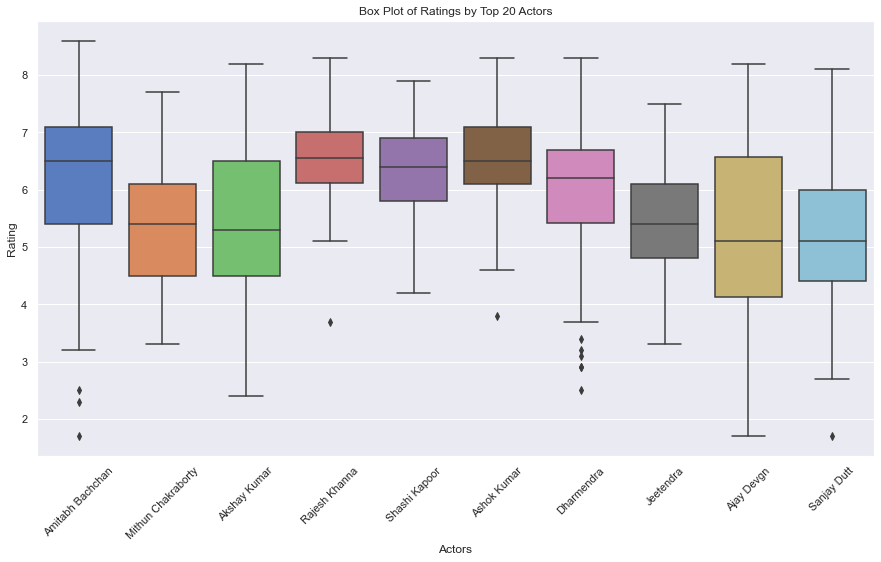

In [39]:
plt.figure(figsize=(15, 8))
TopActors = df1['Actor 1'].value_counts().index[:10]
sns.boxplot(data=df1[df1['Actor 1'].isin(TopActors)], x='Actor 1', y='Rating', palette='muted')

plt.title('Box Plot of Ratings by Top 20 Actors')
plt.xlabel('Actors')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

#### Rating - DirectorWise  : 

In [40]:
director = df1[['Director']].value_counts().sort_values(ascending=False).head(10)
director

Director            
David Dhawan            41
Mahesh Bhatt            39
Ram Gopal Varma         34
Hrishikesh Mukherjee    33
Shakti Samanta          33
Vikram Bhatt            30
Priyadarshan            29
Basu Chatterjee         23
Rama Rao Tatineni       23
Kanti Shah              22
dtype: int64

In [41]:
# Top 10 Highly rated Director
top_10_rated_movies_of_director=df1[(df1['Rating']>=7)]['Director'].head(20)
top_10_actor=df1.groupby(top_10_rated_movies_of_director)['Rating'].mean()
top_10_actor

Director
Amrit Sagar                   8.1
Aparna Sen                    7.3
Dhruv Sachdev                 8.0
Gaurav Bakshi                 7.0
Jayoo Patwardhan              7.7
Konkona Sen Sharma            7.5
Krishna D.K.                  7.3
Nagesh Kukunoor               7.8
Padmakumar Narasimhamurthy    8.1
Pramod Chakravorty            7.2
Praveen Damle                 7.3
Prawaal Raman                 7.3
Rajkumar Hirani               8.4
Shoojit Sircar                7.4
Suhaib Ilyasi                 7.8
Umesh Shukla                  7.4
Vidhu Vinod Chopra            7.2
Vikram K. Kumar               7.3
Vishwesh Krishnamoorthy       7.4
Name: Rating, dtype: float64

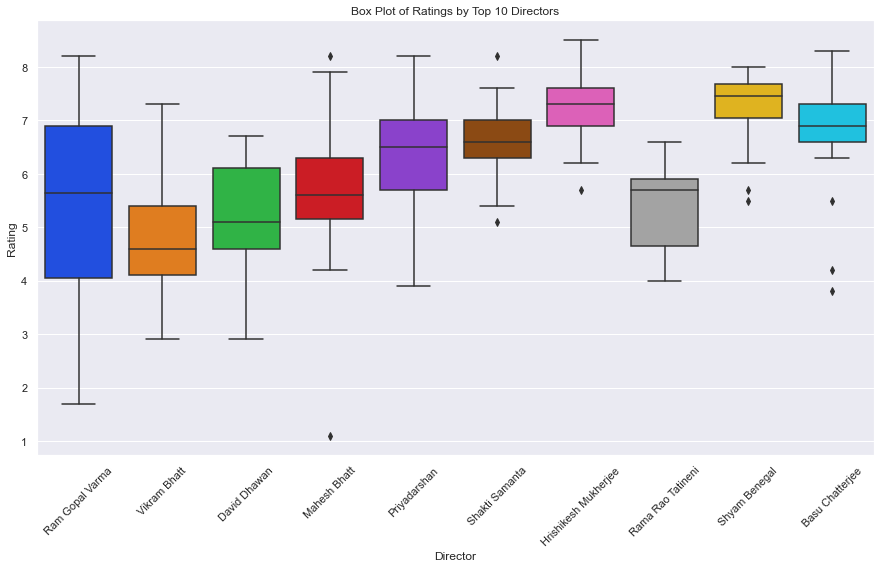

In [42]:
plt.figure(figsize=(15, 8))
TopDirectors=df1['Director'].value_counts().index[0:10]
sns.boxplot(data=df1[df1['Director'].isin(TopDirectors)], x='Director', y='Rating', palette='bright')

plt.title('Box Plot of Ratings by Top 10 Directors')
plt.xlabel('Director')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

### Movies vs year : 

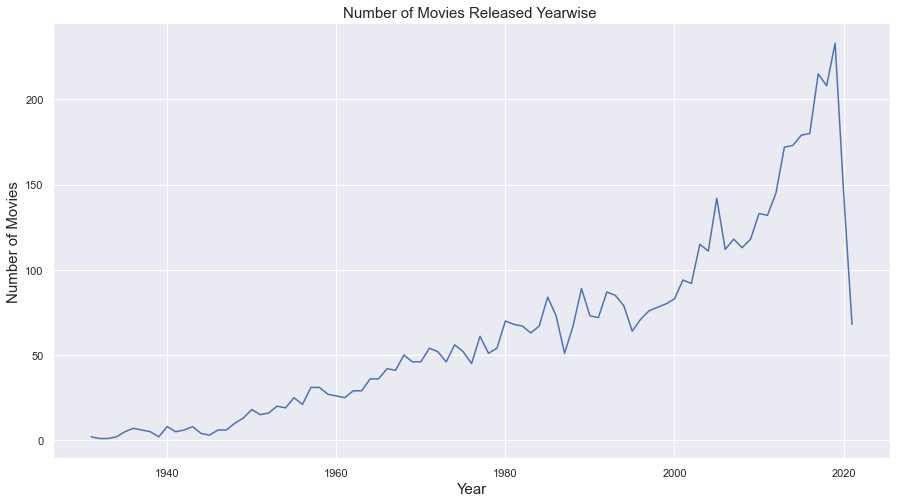

In [43]:
# Grouping data by year and calculate the count of movies for each year
yearwise_movie = df1.groupby('Year').size()

# Create a time series plot for the number of movies released over the years
plt.figure(figsize=(15,8))
plt.plot(yearwise_movie.index, yearwise_movie.values)
plt.title('Number of Movies Released Yearwise ', fontsize = 15)
plt.xlabel('Year', fontsize =15)
plt.ylabel('Number of Movies', fontsize= 15)
plt.show()

**From Above plot we can observe the increasing trend in movie made every year.**

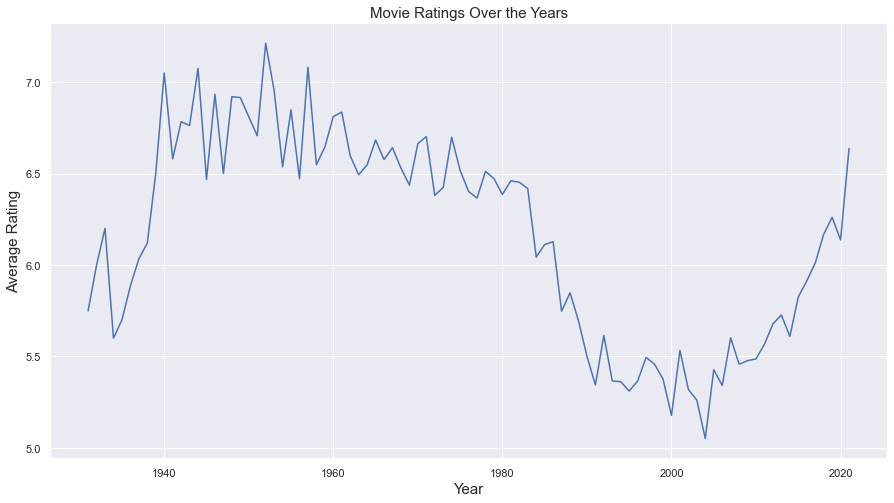

In [44]:
# Grouping data by year and calculate the mean rating for each year
Yearwise_rating= df1.groupby('Year')['Rating'].mean()

# Create a time series plot for movie ratings over the years
plt.figure(figsize=(15,8))
Yearwise_rating.plot()
plt.title('Movie Ratings Over the Years',fontsize=15)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Average Rating',fontsize=15)
plt.show()

**The plot indicates that movies from 1940 to 1980 tend to have higher ratings compared to those released between 1980 and 2000. This suggests that, despite an increase in the number of movies produced during the latter period, their average ratings have declined.**

#### Duration Distribution : 

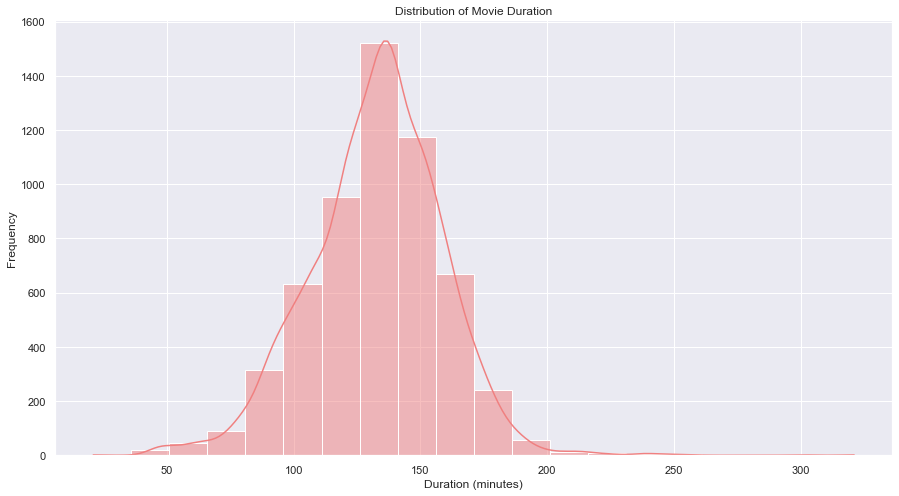

In [45]:
plt.figure(figsize=(15,8))
sns.histplot(df1['Duration'],bins=20,kde=True,color='lightcoral')
plt.title('Distribution of Movie Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

#### Frequency of Votes :

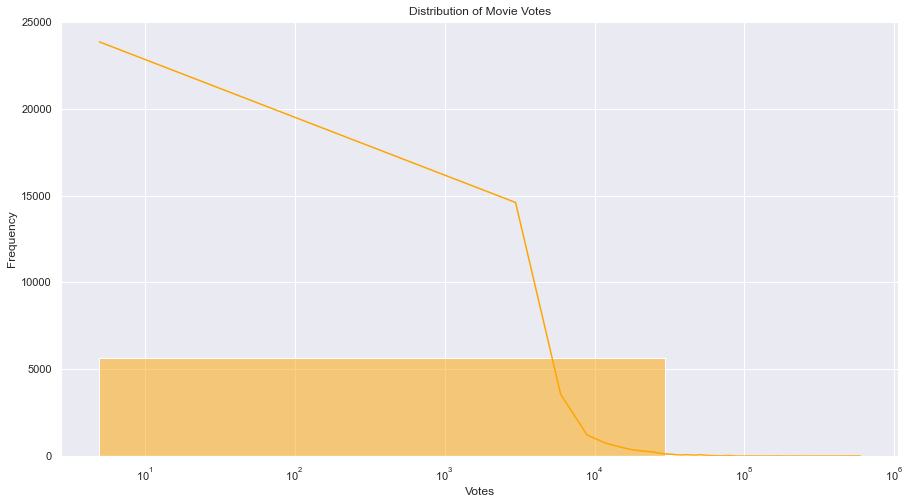

In [46]:
plt.figure(figsize=(15,8))
sns.histplot(df1['Votes'],bins=20,kde=True,color='orange')
plt.title('Distribution of Movie Votes')
plt.xlabel('Votes')
plt.ylabel('Frequency')
plt.xscale('log')
plt.show()

#### Frequency of Genre : 

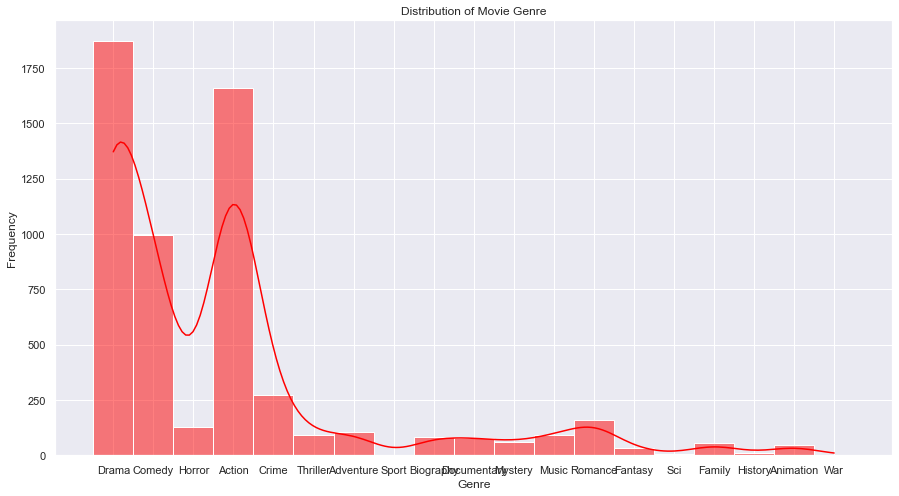

In [47]:
plt.figure(figsize=(15,8))
sns.histplot(df1['Genre'],bins=20,kde=True,color='red')
plt.title('Distribution of Movie Genre')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.show()

#### Top 3 Genre:
**Drama, Action and Comedy genre are most frequent in the dataset.**

In [48]:
# Encoding Coloumns Director,Genre and Actor 1 asper rating.
df1['Director encoded']= round(df1.groupby('Director')['Rating'].transform('mean'), 1)
df1['Actor 1 encoded']= round(df1.groupby('Actor 1')['Rating'].transform('mean'), 1)
df1['Genre Encoded'] =round(df1.groupby('Genre')['Rating'].transform('mean'),1)

In [49]:
df1.head()

,Year,Duration,Rating,Votes,Director,Actor 1,Genre,Director encoded,Actor 1 encoded,Genre Encoded
0,2019.0,109.0,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Drama,7.0,6.8,6.3
1,2019.0,110.0,4.4,35.0,Ovais Khan,Prateik,Comedy,4.4,5.4,5.8
2,1997.0,147.0,4.7,827.0,Rahul Rawail,Bobby Deol,Comedy,5.3,4.8,5.8
3,2005.0,142.0,7.4,1086.0,Shoojit Sircar,Jimmy Sheirgill,Drama,7.4,5.4,6.3
4,2012.0,82.0,5.6,326.0,Allyson Patel,Yash Dave,Horror,5.6,5.6,4.7


In [50]:
# Dropping coloumn Director and Actor 1.
df1.drop(columns=['Director','Actor 1','Genre'],inplace=True)

## 3 Building Models : 

In [51]:
# importing necessary Libraries : 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor

### 3.1 Train-Test Split :

In [52]:
X = df1.drop("Rating",axis=1)
Y = df1["Rating"]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=111)

In [53]:
X_train.shape

(4596, 6)

In [54]:
X_test.shape

(1150, 6)

###  3.2 Models : 

#### 3.2.1 Linear Regression : 

In [55]:
# Building the Linear Regression model
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, Y_train)

# Predicting on the test set
Y_test_predictions = linear_regression_model.predict(X_test)

# Calculating Mean Squared Error
mse_LR = mean_squared_error(Y_test, Y_test_predictions)
print(f"Mean Squared Error (MSE): {mse_LR:.2f}")

# Calculating R-squared score
r2_LR = r2_score(Y_test, Y_test_predictions)
print(f"R-squared score: {r2_LR:.2f}")

Mean Squared Error (MSE): 0.54
R-squared score: 0.73


#### 3.2.2 Decison Tree : 

In [56]:
# Initialize the model
decision_tree_model = DecisionTreeRegressor(random_state=10)

# Fit the model
decision_tree_model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred_DT = decision_tree_model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse_DT = mean_squared_error(Y_test, Y_pred_DT)
print(f"Mean Squared Error (MSE): {mse_DT:.2f}")

# Calculate R-squared score (R2)
r2_DT = r2_score(Y_test, Y_pred_DT)
print(f"R-squared score: {r2_DT:.2f}")

Mean Squared Error (MSE): 0.94
R-squared score: 0.54


#### 3.2.3 Random Forest :

In [57]:
# Initialize the model
random_forest_model = RandomForestRegressor(random_state=10)

# Fit the model
random_forest_model.fit(X_train, Y_train)

# Make predictions on the test set
y_pred_RF = random_forest_model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse_RF= mean_squared_error(Y_test, y_pred_RF)
print(f"Mean Squared Error (MSE): {mse_RF:.2f}")

# Calculate R-squared score (R2)
r2_RF = r2_score(Y_test, y_pred_RF)
print(f"R-squared score: {r2_RF:.2f}")

Mean Squared Error (MSE): 0.48
R-squared score: 0.76


####  3.2.4 Gradient Boosting : 

In [58]:
# Initialize the model
gradient_boost_model = GradientBoostingRegressor(random_state=10)

# Fit the model
gradient_boost_model.fit(X_train, Y_train)

# Make predictions on the test set
y_pred_GB = gradient_boost_model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse_GB = mean_squared_error(Y_test, y_pred_GB)
print(f"Mean Squared Error (MSE): {mse_GB:.2f}")

# Calculate R-squared score (R2)
r2_GB = r2_score(Y_test, y_pred_GB)
print(f"R-squared score: {r2_GB:.2f}")

Mean Squared Error (MSE): 0.48
R-squared score: 0.77


**Creating Evaluation Dataframe :**

In [59]:
Evaluation_Df = pd.DataFrame({
    'Model': ['Linear Regression','Decision Tree','Random Forest','Gradient Boosting'],
    'Mean Squared Error (MSE)': [mse_LR*100,mse_DT*100,mse_RF*100, mse_GB*100],
    'R-squared score (R2)': [r2_LR*100, r2_DT*100,r2_RF*100,r2_GB*100]
})
Evaluation_Df

,Model,Mean Squared Error (MSE),R-squared score (R2)
0,Linear Regression,53.924630,73.479240
1,Decision Tree,93.587826,53.972419
2,Random Forest,47.815188,76.483935
3,Gradient Boosting,47.743138,76.519370


**Visualising :**

In [60]:
models = Evaluation_Df['Model']
mse_scores = Evaluation_Df['Mean Squared Error (MSE)'].round(2)
r2_scores = Evaluation_Df['R-squared score (R2)'].round(2)
num_models = len(models)
width = 0.40
index = np.arange(num_models)

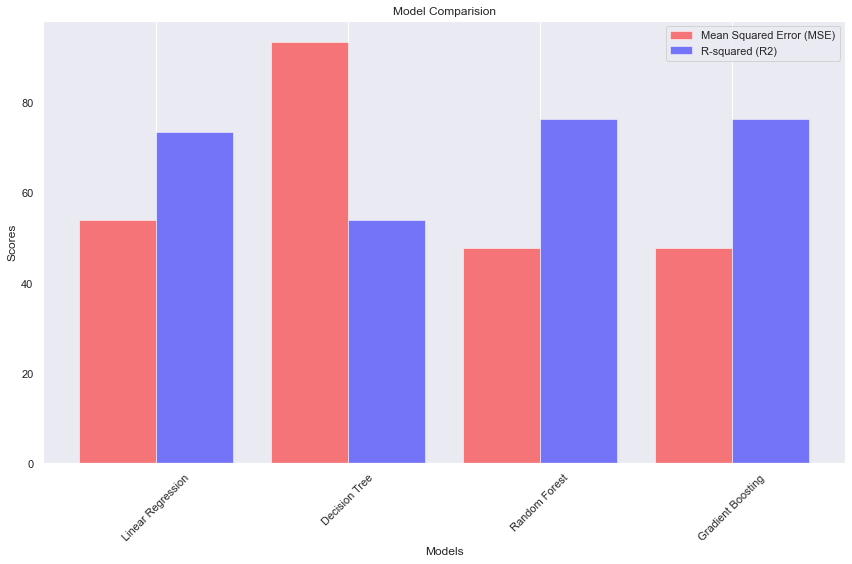

In [61]:
plt.figure(figsize=(12, 8))

plt.bar(index,mse_scores,width,label='Mean Squared Error (MSE)',color='Red',alpha=0.5)
plt.bar(index +width,r2_scores, width,label='R-squared (R2)',color='Blue',alpha=0.5)

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Comparision')
plt.xticks(index +width/2,models,rotation=45)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## 4. Model Evaluation :

We evaluated four regression models for predicting movie ratings: Linear Regression, Decision Tree, Random Forest, and Gradient Boosting. The performance metrics are as follows:

| Model              | Mean Squared Error (MSE) | R-squared score (R²) |
|--------------------|---------------------------|----------------------|
| Linear Regression | 53.924                    | 73.479               |
| Decision Tree      | 93.588                    | 53.972               |
| Random Forest      | 47.815                    | 76.484               |
| Gradient Boosting  | 47.743                    | 76.519               |

### Best Model

**Gradient Boosting**
- **Mean Squared Error (MSE)**: 47.743
- **R-squared score (R²)**: 76.519

**Explanation**: Gradient Boosting achieved the lowest MSE and the highest R² score, making it the best-performing model. It offers the most accurate predictions and explains the highest proportion of variance in movie ratings.

## Detailed Analysis

**Linear Regression**: This model achieves a good balance with an R-squared score of 73.479, indicating it explains a substantial portion of the variance in movie ratings. However, its Mean Squared Error (MSE) of 53.924 is higher compared to other models, suggesting that while it is a decent performer, it falls short in prediction accuracy.

**Decision Tree**: The Decision Tree model has the lowest accuracy with an MSE of 93.588 and an R-squared score of 53.972. Its performance is the weakest among the models, indicating it struggles to generalize well and may overfit the training data, resulting in higher prediction errors and less reliable results.

**Random Forest**: With an MSE of 47.815 and an R-squared score of 76.484, the Random Forest model performs quite well. It provides a robust balance between minimizing errors and explaining variance. While it performs better than Linear Regression and Decision Tree, it still does not surpass the Gradient Boosting model in terms of overall effectiveness.

**Gradient Boosting**: The Gradient Boosting model stands out with the lowest MSE of 47.743 and the highest R-squared score of 76.519. This model offers the best performance by accurately predicting movie ratings and explaining the most variance. Its advanced boosting techniques effectively capture complex patterns and correct errors, making it the most reliable model for this task.

**Summary : Gradient Boosting provides the best balance between prediction accuracy and variance explanation, making it the most reliable model for predicting movie ratings. Random Forest is a strong alternative but does not quite match the performance of Gradient Boosting.**




## 5. Conclusion :

**In this project, we developed and evaluated several machine learning models to predict movie ratings from IMDb Movies dataset. After thorough assessment, the Gradient Boosting model emerged as the best performer, demonstrating the highest accuracy and the best ability to explain variance in movie ratings.**

### Potential Future Improvements:

- **Feature Engineering**: Explore additional feature engineering techniques to enhance the model’s performance by incorporating new insights or data transformations.
- **Dimensionality Reduction**: Investigate dimensionality reduction techniques to improve model efficiency and reduce the risk of overfitting.

